In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
credit = pd.read_csv('Credit_Card.csv')

In [3]:
credit.head()

,clientid,income,age,loan,LTI,default10yr
0,1,66155.93,59.02,8106.53,0.123,0
1,2,34415.15,48.12,6564.75,0.191,0
2,3,57317.17,63.11,8020.95,0.140,0
3,4,42709.53,45.75,6103.64,0.143,0
4,5,66952.69,18.58,8770.10,0.131,1


In [4]:
credit.shape

(2000, 6)

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
clientid       2000 non-null int64
income         2000 non-null float64
age            2000 non-null float64
loan           2000 non-null float64
LTI            2000 non-null float64
default10yr    2000 non-null int64
dtypes: float64(4), int64(2)
memory usage: 93.8 KB


In [6]:
credit.isnull().sum()

clientid       0
income         0
age            0
loan           0
LTI            0
default10yr    0
dtype: int64

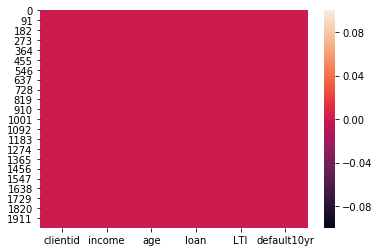

In [7]:
sns.heatmap(credit.isnull());

In [8]:
credit.default10yr.value_counts()

0    1717
1     283
Name: default10yr, dtype: int64

In [9]:
credit.head()

,clientid,income,age,loan,LTI,default10yr
0,1,66155.93,59.02,8106.53,0.123,0
1,2,34415.15,48.12,6564.75,0.191,0
2,3,57317.17,63.11,8020.95,0.140,0
3,4,42709.53,45.75,6103.64,0.143,0
4,5,66952.69,18.58,8770.10,0.131,1


In [10]:
credit = credit.drop('clientid',axis=1)

In [11]:
credit.head()

,income,age,loan,LTI,default10yr
0,66155.93,59.02,8106.53,0.123,0
1,34415.15,48.12,6564.75,0.191,0
2,57317.17,63.11,8020.95,0.140,0
3,42709.53,45.75,6103.64,0.143,0
4,66952.69,18.58,8770.10,0.131,1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


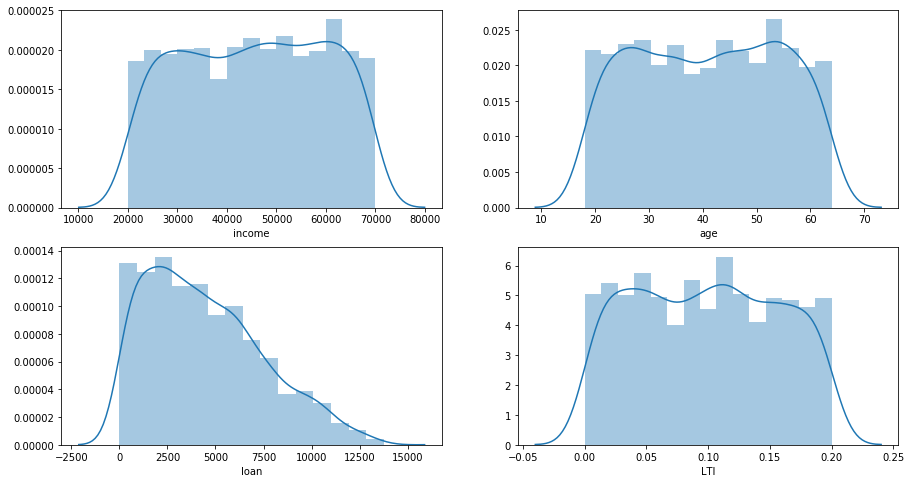

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(credit.income, bins=15);
plt.subplot(2,2,2)
sns.distplot(credit.age, bins=15);
plt.subplot(2,2,3)
sns.distplot(credit.loan, bins=15);
plt.subplot(2,2,4)
sns.distplot(credit.LTI, bins=15);

In [13]:
credit.describe()

,income,age,loan,LTI,default10yr
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.599930,40.927245,4444.369635,0.098392,0.141500
std,14326.327142,13.262516,3045.409995,0.057619,0.348624
min,20014.490000,18.060000,1.380000,0.000000,0.000000
25%,32796.457500,29.060000,1939.705000,0.048000,0.000000
50%,45789.120000,41.380000,3974.720000,0.099500,0.000000
75%,57791.285000,52.600000,6432.407500,0.148000,0.000000
max,69995.690000,63.970000,13766.050000,0.200000,1.000000


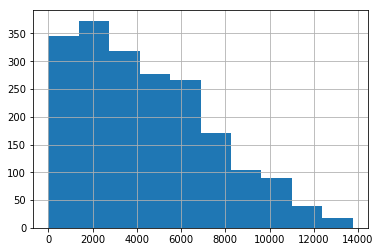

In [14]:
credit.loan.hist();

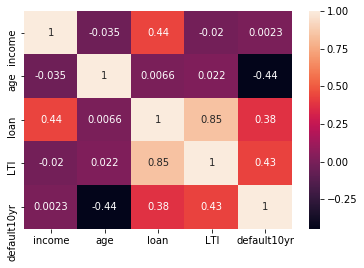

In [15]:
sns.heatmap(credit.corr(),annot=True);

In [16]:
credit.head()

,income,age,loan,LTI,default10yr
0,66155.93,59.02,8106.53,0.123,0
1,34415.15,48.12,6564.75,0.191,0
2,57317.17,63.11,8020.95,0.140,0
3,42709.53,45.75,6103.64,0.143,0
4,66952.69,18.58,8770.10,0.131,1


In [17]:
y = credit['default10yr']
X = credit.drop(['default10yr'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Model

In [20]:
model_logistic = LogisticRegression()

In [21]:
model_logistic.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_pred_logistic = model_logistic.predict(X_test)

In [23]:
print(confusion_matrix(y_pred_logistic, y_test))

[[320   9]
 [ 11  60]]


In [24]:
classification_report(y_pred_logistic, y_test)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       329\n           1       0.87      0.85      0.86        71\n\n   micro avg       0.95      0.95      0.95       400\n   macro avg       0.92      0.91      0.91       400\nweighted avg       0.95      0.95      0.95       400\n'

In [25]:
print(classification_report(y_pred_logistic, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       329
           1       0.87      0.85      0.86        71

   micro avg       0.95      0.95      0.95       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.95      0.95      0.95       400



In [26]:
accuracy_score(y_pred_logistic, y_test)

0.95

In [27]:
print("Accuracy of Logistic Model is",(accuracy_score(y_pred_logistic, y_test)*100),"%")

Accuracy of Logistic Model is 95.0 %


### Accuracy of Logistic Model is 95.0%

## Decision Tree Model

In [28]:
model_decision = DecisionTreeClassifier()

In [29]:
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_pred_decision = model_decision.predict(X_test)

In [31]:
print(classification_report(y_pred_decision, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.97      1.00      0.99        67

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



In [32]:
confusion_matrix(y_pred_decision, y_test)

array([[331,   2],
       [  0,  67]])

In [33]:
accuracy_score(y_pred_decision, y_test)

0.995

In [34]:
print("Accuracy of Decision Tree Model is",(accuracy_score(y_pred_decision, y_test)*100),"%")

Accuracy of Decision Tree Model is 99.5 %


### Accuracy of Decision Tree Model is 99.5%

## Bagging Ensemble Model (To reduce Variance or Noise or Complexity)

In [35]:
model_bagging = BaggingClassifier()

In [36]:
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [37]:
y_pred_bagging = model_bagging.predict(X_test)

In [38]:
print(classification_report(y_pred_bagging, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.97      1.00      0.99        67

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



In [39]:
print(confusion_matrix(y_pred_bagging, y_test))

[[331   2]
 [  0  67]]


In [40]:
accuracy_score(y_pred_bagging, y_test)

0.995

In [41]:
print("Accuracy of Bagging Ensemble Model is",(accuracy_score(y_pred_bagging, y_test)*100),"%")

Accuracy of Bagging Ensemble Model is 99.5 %


### Accuracy of Bagging Ensemble Model is 99.50%

## Random Forest Model

In [42]:
model_random = RandomForestClassifier(n_estimators=100)

In [43]:
model_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred_random = model_random.predict(X_test)

In [45]:
print(classification_report(y_pred_random, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.97      1.00      0.99        67

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



In [46]:
print(confusion_matrix(y_pred_random, y_test))

[[331   2]
 [  0  67]]


In [47]:
accuracy_score(y_pred_random, y_test)

0.995

In [48]:
print("Accuracy of Random Forest Model is",(accuracy_score(y_pred_random, y_test)*100),"%")

Accuracy of Random Forest Model is 99.5 %


### Accuracy of Random Forest Model is 99.5 %

## Support Vector Machine Model

In [49]:
model_svm = svm.SVC()

In [50]:
model_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
y_pred_svm = model_svm.predict(X_test)

In [52]:
print(classification_report(y_pred_svm, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       331
           1       0.94      0.94      0.94        69

   micro avg       0.98      0.98      0.98       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.98      0.98      0.98       400



In [53]:
print(confusion_matrix(y_pred_svm, y_test))

[[327   4]
 [  4  65]]


In [54]:
accuracy_score(y_pred_svm, y_test)

0.98

In [55]:
print("Accuracy of Supprt vector Machine Model is",(accuracy_score(y_pred_svm, y_test)*100),"%")

Accuracy of Supprt vector Machine Model is 98.0 %


### Accuracy of Supprt vector Machine Model is 98.0 %

## XG Boosting Ensemble Model

In [56]:
!pip install xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
pip install --upgrade pip


The following command must be run outside of the IPython shell:

    $ pip install --upgrade pip

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [58]:
import xgboost as xgb
from xgboost import XGBClassifier

In [59]:
model_xgb = XGBClassifier()

In [60]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [61]:
y_pred_xgb = model_xgb.predict(X_test)

In [62]:
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       333
           1       0.97      1.00      0.99        67

   micro avg       0.99      0.99      0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



In [63]:
print(confusion_matrix(y_pred_xgb, y_test))

[[331   2]
 [  0  67]]


In [64]:
accuracy_score(y_pred_xgb, y_test)

0.995

In [65]:
print("Accuracy of XG Boost Model is",(accuracy_score(y_pred_xgb, y_test)*100),"%")

Accuracy of XG Boost Model is 99.5 %


### Accuracy of XG Boost Model is 99.5 %

## K Nearest Neighbors Model

In [66]:
model_knn = KNeighborsClassifier(n_neighbors = 20, p=2,  metric='euclidean')

In [67]:
import math
math.sqrt(len(y_test))

20.0

In [68]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [69]:
y_pred_knn = model_knn.predict(X_test)

In [70]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       338
           1       0.88      0.98      0.93        62

   micro avg       0.98      0.98      0.98       400
   macro avg       0.94      0.98      0.96       400
weighted avg       0.98      0.98      0.98       400



In [71]:
print(confusion_matrix(y_pred_knn, y_test))

[[330   8]
 [  1  61]]


In [72]:
accuracy_score(y_pred_knn, y_test)

0.9775

In [73]:
print("Accuracy of K Nearest Neighbors Model is",(accuracy_score(y_pred_knn, y_test)*100),"%")

Accuracy of K Nearest Neighbors Model is 97.75 %


### Accuracy of K Nearest Neighbors Model is 97.75 %

In [74]:
print("Accuracy of Logistic Model is",(accuracy_score(y_pred_logistic, y_test)*100),"%")
print("Accuracy of Decision Tree Model is",(accuracy_score(y_pred_decision, y_test)*100),"%")
print("Accuracy of Bagging Ensemble Model is",(accuracy_score(y_pred_bagging, y_test)*100),"%")
print("Accuracy of Random Forest Model is",(accuracy_score(y_pred_random, y_test)*100),"%")
print("Accuracy of Supprt vector Machine Model is",(accuracy_score(y_pred_svm, y_test)*100),"%")
print("Accuracy of XG Boost Model is",(accuracy_score(y_pred_xgb, y_test)*100),"%")
print("Accuracy of K Nearest Neighbors Model is",(accuracy_score(y_pred_knn, y_test)*100),"%")

Accuracy of Logistic Model is 95.0 %
Accuracy of Decision Tree Model is 99.5 %
Accuracy of Bagging Ensemble Model is 99.5 %
Accuracy of Random Forest Model is 99.5 %
Accuracy of Supprt vector Machine Model is 98.0 %
Accuracy of XG Boost Model is 99.5 %
Accuracy of K Nearest Neighbors Model is 97.75 %


### Accuracy of Logistic Model is 95.0 %
### Accuracy of K Nearest Neighbors Model is 97.75 %
### Accuracy of Supprt vector Machine Model is 98.0 %
### Accuracy of Decision Tree Model is 99.5 %
### Accuracy of Bagging Ensemble Model is 99.5 %
### Accuracy of XG Boost Model is 99.5 %
## Accuracy of Random Forest Model is 99.75 %. So we will prefer this as Best Model with High Accuracy.